# Global params

In [1]:
img_directory = '/home/ec2-user/autoencoder-vaegan/colbert'
img_save_directory = '/home/ec2-user/autoencoder-vaegan/colbert-out'
model_weights_path = '/home/ec2-user/colbert-auto-plain-weights.hdf5'
batch_size = 8
training_set_size = 3264
img_size = 128

# Imports and helper functions

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import load_img, resize_crop
%matplotlib inline

def imshow(imgs):
    fig = plt.figure(figsize=(20, 20))
    
    nimgs = len(imgs)
    for i in range(nimgs):
        a=fig.add_subplot(1,nimgs,i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

# Create model and load weights

Instantiate model

In [3]:
from image_autoencoder import ImageAutoencoder
from keras.optimizers import Adam

model = ImageAutoencoder(img_shape=(img_size, img_size, 3), batch_size=batch_size)
model.build_model()

Using TensorFlow backend.


Compile model

In [4]:
# model.model.compile(Adam(lr=.00001), 'binary_crossentropy')
# model.model.compile(Adam(lr=.000001), 'binary_crossentropy')

Load weights

In [4]:
if (True):
    model.model.load_weights(model_weights_path)

# Sample z and plot

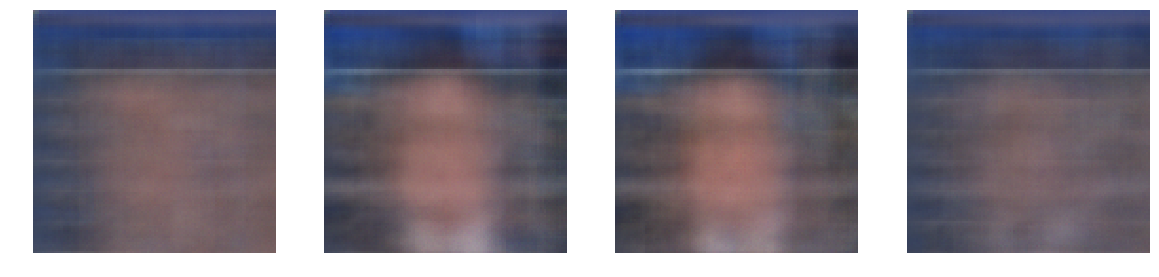

In [80]:
mu, sigma = (0.0, 1.0)
z = np.random.normal(loc=mu, scale=sigma, size=(batch_size, model.zsize))

decoder = model.decoder
y = decoder.predict(z, batch_size=batch_size)
imshow([y[i] for i in range(4)])